In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 1) Reading the file contents :

Source of dataset : https://www.kaggle.com/sudalairajkumar/indian-startup-funding

In [2]:
import pandas as pd

dataset = pd.read_csv('startup_funding.csv')

## 1.1) Looking up the data spread and format for Pre-processing(if needed) :

**First few entries of dataset are as follows :**

In [3]:
dataset.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [4]:
dataset.shape

(3044, 10)

There are **3044** rows and **10** columns.

#### The column datatypes are as follows :

In [5]:
dataset.dtypes

Sr No                 int64
Date dd/mm/yyyy      object
Startup Name         object
Industry Vertical    object
SubVertical          object
City  Location       object
Investors Name       object
InvestmentnType      object
Amount in USD        object
Remarks              object
dtype: object

The columns of the dataset are as follows :-
1) **Sr No** : Serial number of all the entries.

2) **Date dd/mm/yyyy** : Date of funding.

3) **Startup Name** : Name of the startup which got funded.

4) **Industry Vertical** : Industry to which the startup belongs.

5) **SubVertical** : Sub-category of the industry types.

6) **City Location** : City at which the Startup is based.

7) **Investors Name** : Name of the investors involved in the funding round.

8) **InvestmentnType** : Type of investment on the startup.

9) **Amount in USD** : The amount funded by the investor to statup in US Dollars.

10) **Remarks** : Extra remarks (if any).

### 1.1.1) Changing the column names for ease-of-access :

In [6]:
dataset.columns = ['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City', 'InvestorName', 'InvestorType', 'Amount', 'Remarks']
dataset.dtypes

SNo                  int64
Date                object
StartupName         object
IndustryVertical    object
SubVertical         object
City                object
InvestorName        object
InvestorType        object
Amount              object
Remarks             object
dtype: object

### 1.1.2) Checking all the column separately and preprocess them (if needed) :

#### 1.1.2.1) SNo :
For our analysis there is no need for this column, so deleting this will be a good choice.

In [7]:
dataset.drop(['SNo'], axis = 1, inplace = True)

#### 1.1.2.2) Date :

The general date format is "dd/mm/yyyy" but some dates are not formatted so we need to find those and apply the correct transformations to change it to the general format.

In [8]:
import re

dates = dataset.Date.unique()
for date in dates :
    if not re.match(r'^[0-9]{2}/[0-9]{2}/[0-9]{4}$', date) :
        print(date)

05/072018
01/07/015
\\xc2\\xa010/7/2015
12/05.2015
13/04.2015
15/01.2015
22/01//2015


The above date formats seems to create the problem so we need to fix this.

The above types of strings can be generalised using regular expressions by following rules :-

(05/072018) -> **^[0-9]{2}/[0-9]{6}$**

(01/07/015) -> **^[0-9]{2}/[0-9]{2}/[0-9]{3}$**

(\\\\xc2\\\\xa010/7/2015) -> **^\\\\.*$**

(12/05.2015, 13/04.2015, 15/01.2015) -> **^[0-9]{2}/[0-9]{2}.[0-9]{4}$**

(22/01//2015) -> **^[0-9]{2}/[0-9]{2}//[0-9]{4}$**

#### The following function will reformat the dates in the correct format :

In [9]:
import datetime

def fixDates(date) :
    if re.match(r'^[0-9]{2}/[0-9]{6}$', date) :
        dateContents = date.split('/')
        date = (dateContents[0] + '/' + dateContents[1][:2] + '/' + dateContents[1][2:])
    
    if re.match(r'^[0-9]{2}/[0-9]{2}/[0-9]{3}$', date) :
        dateContents = date.split('/')
        date = (dateContents[0] + '/' + dateContents[1] + '/2' + dateContents[2])
    
    if re.match(r'^\\.*$', date) :
        dateContents = date.split('/')
        date = (dateContents[0][-2:] + r'/0' + dateContents[1] + '/' + dateContents[2])
    
    if re.match(r'^[0-9]{2}/[0-9]{2}\.[0-9]{4}$', date) :
        dateContents1 = date.split('/')
        dateContents2 = dateContents1[1].split('.')
        date = (dateContents1[0] + '/' + dateContents2[0] + '/' + dateContents2[1])
    
    if re.match(r'^[0-9]{2}/[0-9]{2}//[0-9]{4}$', date) :
        dateContents1 = date.split('//')
        dateContents2 = dateContents1[0].split('/')
        date = (dateContents2[0] + '/' + dateContents2[1] + '/' + dateContents1[1])
    
    return date

#### Converting these dates by first fixing them and their formats

In [10]:
dataset.Date = pd.to_datetime(dataset.Date.apply(fixDates))
dataset.Date.isna().sum()

0

**There are no invalid entries left in Date column.**

#### 1.1.2.3) StartupName :

First let's check out unique entries to spot anomalies in the startup names (if any) :

In [11]:
sNames = dataset.StartupName.unique()
for name in sNames :
    print(name)

BYJU’S
Shuttl
Mamaearth
https://www.wealthbucket.in/
Fashor
Pando
Zomato
Ecozen
CarDekho
Dhruva Space
Rivigo
Healthians
Licious
InCred
Trell
Rein Games
Lenskart.com
Freshworks
Misters
Sunstone Eduversity Pvt. Ltd
Burger Singh
Ninjacart
Aye Finance
SuperGaming
Clumio
eBikeGo
Digital Mall Asia
Medikabazaar
Vogo Automotive
Furtados School of Music
Paytm
Dunzo
Udaan
The Man Company
FPL Technologies
Cashflo
Digital F5
3rdFlix
75F
Myelin Foundry
Atomberg Technology
GOQii
Vyapar App
Progcap
MyPetrolPump
Alteria Capital
Pine Labs
Meesho
Cars24
Uniphore
Zendrive
Lo! Foods
Tala
INDwealth
HungerBox
AdmitKard
Mishry Reviews
Grofers
Rapido Bike Taxi
RenewBuy
Atlan
WizCounsel
Ola Cabs
Daalchini Technologies
"BYJU\\'S"
Moglix
Ezyhaul
Indus OS
HealthAssure
House of Msasaba
Board Infinity
NoBroker
Bira91
FabHotels
Avail Finance
BharatPe
Recykal
Agara Labs
Sistema.bio
Chakr Innovation
Pratilipi
Bolo App
OkCredit
Biz2Credit
Vogo Automotive Pvt. Ltd.
Leegality
Ola Electric
Saahas Zero Waste
StyleDotMe
Bla

There were many anomalies, but as I went throught the data these anomalies, these anomalies can be generalised. I've formulated rule for them as follows :

**Rule 1.** Some names are enclosed under double quotes, so we remove the quotes. (eg. "BYJU\\'S" -> Byju's)

**Rule 2.** Specifically BYJU'S have many different names, so to make them all same I will capitalize the Startup Names field. Also the apostrophe of byjus is a special character so I will replace that character with normal single quote for any name containing the special character (in unicode the character is '\\u2019'). (eg. BYJU’S -> Byju's)

**Rule 3.** It is also seen that at many places instead of apostrophe a string is used that is "\\\\xe2\\\\x80\\\\x99" is placed so I will replace that. (eg. What\\\\xe2\\\\x80\\\\x99s Up Life -> What's Up Life)

**Rule 4.** Also there is one more variant of the above case "\\xe2\\x80\\x99" to be replaced by single quote. (eg. Let\xe2\x80\x99s Barter -> Let's Barter)

**Rule 5.** Some startup names have a string in between "\\\\xc2\\\\xa0" which we will remove first. (eg. \\\\xc2\\\\xa0Nudgespot -> Nudgesspot)

**Rule 6.** Some startup names has "\\\\n" in between which will be replaced by a blank space. (eg. Alef\\\\nMobitech -> Alef Mobitech)

**Rule 7.** One more special string is seen as only "\\\\" which will be removed as well. (eg. "BYJU\\\\'S" -> Byju's)

**Rule 8.** Also there are websites name so I will clear out the "https://www.' part and ending "/". (eg. https://www.wealthbucket.in/ -? Wealthbucket.in)

**Rule 9.** For Ola, there are many names in the dataset like, "Ola Cabs", "Ola Electric", and "Olacabs". So, I will replace this by "Ola".

**Rule 10.** For Flipkart, there is one more name that is, "Flipkart.com". So, I will replace this by "Flipkart".

**Rule 11.** For Oyo, there are many names that are, "Oyorooms", "OYOfit", "Oyo Rooms", "OYO Rooms", and "OyoRooms". I will replace these names by "Oyo".

**Rule 12.** For Rapido, there is another name "Rapido Bike Taxi", I will change it to "Rapido".

**Rule 13.** For Paytm, there is one more name, that is "Paytm Marketplace". So, I wiil change it to "Paytm".

In [12]:
def fixStartupNames(name) :
    name = name.strip("\"").strip() # Rule 1
    name = name.replace('\u2019', '\'') # Rule 2
    name = name.replace(r'\\xe2\\x80\\x99', '\'') # Rule 3
    name = name.replace(r'\xe2\x80\x99', '\'') # Rule 4
    name = name.replace(r'\\xc2\\xa0', '') # Rule 5
    name = name.replace(r'\n', r' ') # Rule 6
    name = name.replace('\\', '') # Rule 7
    # Rule 8
    if name.startswith('https://') :
        name = name[8: ]
    if name.startswith('www.') :
        name = name[4: ]
    if name.endswith('/') :
        name = name[: len(name) - 1]
    
    # Rule 9 
    if name == "Ola Cabs" or name == "Ola Electric" or name == "Olacabs" :
        name = 'Ola'
    
    # Rule 10
    if name == "Flipkart.com" :
        name = "Flipkart"
    
    # Rule 11
    if name == "Oyorooms" or name == "OYOfit" or name == "Oyo Rooms" or name == "OYO Rooms" or name == "OyoRooms" :
        name = 'Oyo'
    
    # Rule 12
    if name == "Rapido Bike Taxi" :
        name = "Rapido"
    
    # Rule 13
    if name == "Paytm Marketplace" :
        name = 'Paytm'
    return " ".join([component.capitalize() for component in name.split()])

In [13]:
dataset.StartupName = dataset.StartupName.apply(fixStartupNames)

In [14]:
dataset.StartupName.isna().sum()

0

**There is no invalid entries left in the StartupName column.**

#### 1.1.2.4) IndustryVertical

Let's first check if our data has anomalies :

In [15]:
industryverticals = dataset.IndustryVertical.unique()
for industryVertical in sorted(industryverticals.astype(str)) :
    print(industryVertical)

360-degree view creating platform
3D Printer Manufacturer
AI
API Workflow platform
Accounting
Activity Based Social Network
Advertising & Marketing Community Networking platform
Advertising, Marketing
Aerospace
Affordable Education
Affordable Hotel Booking Online
Agriculture
Agtech
Algorithmic Match Making Platform
Alternate Mobile Monetization platform
App Analytics platform
App based Bus Pooling Services
App based Fitness coaching
App security\\xc2\\xa0 testing platform
Architectural Design & Consulting
Artificial Intelligence
Artificial Intelligence Ecommerce Chatbot
Artificial Intelligence platform
Artist / Designer Marketplace
Asset Financing platform
Auto
Auto Insurance Online platform
Auto Rickshaw Based Services
Auto Rickshaw based Logistics
Automated Storage & Warehousing Solution
Automation
Automobile
Automotive
Automotive Services platform
Autorickshaw Aggregator & Booking platform
B2B
B2B Marketing
B2B Merchandize platform
B2B Mobile Auction Marketplace
B2B Platform
B2B eCo

Online Wedding Marketplace
Online and TV Shopping Marketplace
Online budget hotel chain
Online comparison engine
Online content platform for women
Online education marketplace
Online food ordering & Delivery service
Online home d\\xc3\\xa9cor marketplace
Online marketplace for Chef Meals
Online marketplace for Photographers
Online printing marketplace
Online user engagement platform
Order Fulfillment SAAS platform
Organic Food ecommerce
Organic Food etailer
Others
P2P Payments platform
P2P Pre-owned goods marketplace
Parents & Kids Online platform
Parents focused Web Content
Payment Services platform
Payment Solutions platform
Payments Solution Provider
Payments Solution platform
Peer to Peer Lending platform
Peer-to-Peer Money Transfer & Recharge App
Performance Optimization Platform for athletes
Performance based Wholesale Marketplace
Personal Diagnostic Mobile App
Personalized Stock Intelligence Platform
Personalized Styling platform
Personalized Wish List creator app
Photographer O

The anomalies can be found in this column as well, but here again these anomalies can be generalised. The rules to generalise these are as follows :

**Rule 1.** A special string "\\\\xc2\\\\xa0" has to removed. (eg. \\\\xc2\\\\xa0Casual Dining restaurant Chain -> Causal Dining Restraunt Chain)

**Rule 2.** Another such string "\\\\xe2\\\\x80\\\\x99" has to be replaced by single quotes. (eg. ECommerce Brands\\xe2\\x80\\x99 Full Service Agency -> Ecommerce Brands' Full Service Agency)

**Rule 3.** There is another variant of the above string pattern. This is "\\xe\\x80\\x99" and should be removed.

**Rule 4.** There is a string pattern "\\xe2\\x80\\x93" which has to be removed. (eg. WiFi \\xe2\\x80\\x93 first Cloud communication platform -> Wifi First Cloud Communications Platform)

**Rule 5.** A string pattern "\\\\xc3\\\\xa9" needs to replaced by "e". (eg. Home Design & D\\xc3\\xa9cor platform -> Home Design & Decor platform)

**Rule 6.** Some of them have a string "\\\\n" in between which has to be replaced by a blank space. (eg. Online Furnishing\\\\neCommerce -> Online Funishing Ecommerce)

**Rule 7.** Some string has "\\\\" pattern which needs to be removed too.

**Rule 8.** Some of the data which are same are represented differently, like E-Commerce, Ecommerce, eCommerce. So, I will remove "-" and capitalize all the words.

In [16]:
def fixIndustryVertical(name) :
    name = name.replace(r'\\xc2\\xa0', '') # Rule 1
    name = name.replace(r'\\xe2\\x80\\x99', '\'') # Rule 2
    name = name.replace(r'\xe2\x80\x99', '') # Rule 3
    name = name.replace(r'\xe2\x80\x93', '') # Rule 4
    name = name.replace(r'\\xc3\\xa9', 'e') # Rule 5
    name = name.replace(r'\n', r' ') # Rule 6
    name = name.replace('\\', '') # Rule 7
    # Rule 8
    name = "".join(name.strip().split('-'))
    return " ".join([component.capitalize() for component in name.split()])

In [17]:
dataset.IndustryVertical.isna().sum()

171

There are **171** NaN values, so I will fill these values as "Unknown"

In [18]:
dataset.IndustryVertical.fillna('Unknown', inplace = True)

In [19]:
dataset.IndustryVertical = dataset.IndustryVertical.apply(fixIndustryVertical)

#### 1.1.2.5) SubVertical :

First, lets check out if there are anomalies in this column to adress.

In [20]:
subVerticals = dataset.SubVertical.unique()
for subVertical in sorted(subVerticals.astype(str)) :
    print(subVertical)

"Women\\'s Fashion Clothing Online Platform"
3D Printing Solutions for Edu space
3D printed experimental Human Liver tissue creator
A Doctor-Patient Engagement Platform
A Local Discovery App For Dining-Out, Party, Leisure and Events
AI Based Expense Management Platform
AI Based Personal Assistant
AI Based Solutions Platform
AI Driven Health tech Platform
AI Platform
AI Powered Content & Commerce platform
AI based Fashion Search Portal
AI based FinTech platform
AI based Office Assistant Mobile App
AI based data analytics platform
AI based pharmacy drugs insights platform
AI platform for hospitality industry
AI powered recruitment platform
AI product company For Health and Life Insurane Companies
AI, Machine learning Solutions
AI-Based Energy Optimisation and Control Provider
AI-based Software as a Service Solution provider
AI-based chatbot
AI-based health content platform
AI-driven B2B marketing platform
AI-powered anti-fraud solutions
AI-powered deep learning solutions
API Platform
AR 

There are anomalies in this column as well but the anomalies are very similar to the "IndustryVertical" column. Again, these anomalies can be generalised and therefore rules can be formulated :

**Rule 1.** There is a presence of double quotes around some data, so we will remove these. (eg. "Women\\'s Fashion Clothing Online Platform" -> Women's Fashion Clothing Online Platform)

**Rule 2.** We have 2 string patterns to be removed. These are, "\\\\xe2\\\\x80\\\\x99" and "\\xe2\\x80\\x99". (eg. Children\\\\xe2\\\\x80\\\\x99s Entertainment Portal -> Childrens Entertainment Portal, Children\xe2\x80\x99s Entertainment Games & Products -> Childrens Entertainment Games & Products)

**Rule 3.** We have one string pattern, "\\\\xc2\\\\xa0" which we will replace by a single space. (eg. Applied Artificial Intelligence and IoT focused\\xc2\\xa0Platform -> Applied Artificial Intelligence And Iot focused Platform)

**Rule 4.** There is one more string pattern "\\\\xc3\\\\xa9" to be replaced by "e". (eg. Home D\\xc3\\xa9cor Product etailer -> Home Decor Product Etailer)

**Rule 5.** The pattern "\\\\n" needs to be removed. (eg. \\\\nLoans Comparison platform\\\\n\\\\n\\\\n\\\\n     (adsbygoogle = window.adsbygoogle || []).push({});\\\\n\\\\n -> Loans Comparison Platform)

**Rule 6.** The above example is unique so I can remove from "(adsbygoogle".

**Rule 7.** I will also remove "\\\\" . (eg. "Women\\\\'s Fashion Clothing Online Platform" -> Women's Fashion Clothing Platform)

**Rule 8.** There are many same name with different reprentations. So, just like the column before, I will remove all '-' and capitalize all the words.

In [21]:
def fixSubVerticals(name) :
    name = name.strip("\"").strip() # Rule 1
    # Rule 2
    name = name.replace(r'\\xe2\\x80\\x99', '')
    name = name.replace(r'\xe2\x80\x99', '')
    name = name.replace(r'\\xc2\\xa0', ' ') # Rule 3
    name = name.replace(r'\\xc3\\xa9', 'e') # Rule 4
    name = name.replace(r'\n', r' ') # Rule 5
    name = name.replace('\\', '') # Rule 7
    # Rule 6
    googleAdIndex = name.find("(adsbygoogle")
    if googleAdIndex != -1 :
        name = name[: googleAdIndex]
    # Rule 8
    name = "".join(name.strip().split('-'))
    return " ".join([component.capitalize() for component in name.split()])

Befor applying the transformation first check if there are NA values.

In [22]:
dataset.SubVertical.isna().sum()

936

Since there are NA values, Let's fill them with "Unknown".

In [23]:
dataset.SubVertical.fillna('Unknown', inplace = True)

Now, lets format the SubVertical column.

In [24]:
dataset.SubVertical = dataset.SubVertical.apply(fixSubVerticals)

#### 1.1.2.6) City :

First Let's check out if there are any anomalies in this column.

In [25]:
cities = dataset.City.unique()
for city in sorted(cities.astype(str)) :
    print(city)

Agra
Ahemadabad
Ahemdabad
Ahmedabad
Amritsar
Andheri
Bangalore
Bangalore / Palo Alto
Bangalore / SFO
Bangalore / San Mateo
Bangalore / USA
Bangalore/ Bangkok
Belgaum
Bengaluru
Bengaluru and Gurugram
Bhopal
Bhubaneswar
Bhubneswar
Boston
Burnsville
California
Chandigarh
Chembur
Chennai
Chennai/ Singapore
Coimbatore
Dallas / Hyderabad
Delhi
Delhi & Cambridge
Faridabad
Gaya
Goa
Goa/Hyderabad
Gurgaon
Gurgaon / SFO
Gurugram
Gwalior
Haryana
Hubli
Hyderabad
Hyderabad/USA
India
India / US
India/Singapore
India/US
Indore
Jaipur
Jodhpur
Kanpur
Karnataka
Karur
Kerala
Kochi
Kolkata
Kolkatta
Kormangala
Kozhikode
London
Lucknow
Menlo Park
Missourie
Mumbai
Mumbai / Global
Mumbai / NY
Mumbai / UK
Mumbai/Bengaluru
Nagpur
Nairobi
New Delhi
New Delhi / California
New Delhi / US
New Delhi/ Houston
New York
New York, Bengaluru
New York/ India
Noida
Noida / Singapore
Nw Delhi
Palo Alto
Panaji
Pune
Pune / Dubai
Pune / Singapore
Pune / US
Pune/Seattle
Rourkela
SFO / Bangalore
San Francisco
San Jose,
Santa Moni

There are anomalies present in the City column as well. The data is comparatively less from other columns, so its easier to directly apply changes. There can be rules formulated for this scenario as well :

**Rule 1.** There is a string pattern "\\\\xc2\\\\xa0" which needs to be removed. (eg. \\xc2\\xa0Bangalore -> Bangalore)

**Rule 2.** There are cities where more than one location is there separated by delimeters like "/", ",", "&", and "and". So we will extract the cities and store it in alphabetical order.

**Rule 3.** Some city names are mispelled and some city has multiple names. So we can have a separate dictionary to correct these. The following changes has to be done :

a) Ahemadabad -> Ahmedabad

b) Ahemdabad -> Ahmedabad

c) Bengaluru -> Bangalore

d) Bhubneswar -> Bhubaneswar

e) Gurgaon -> Gurugram

f) Kolkatta -> Kolkata

g) Nw Delhi -> New Delhi

h) USA -> US

**Rule 4.** At last for multiple cities, comma seaprated result will be transformed

In [26]:
cityCorrections = {'Ahemadabad': 'Ahmedabad', 'Ahemdabad': 'Ahmedabad', 'Bengaluru': 'Bangalore', 'Bhubneswar': 'Bhubaneswar', 'Gurgaon': 'Gurugram', 'Kolkatta': 'Kolkata', 'Nw Delhi': 'New Delhi', 'USA': 'US'}
def fixCity(name) :
    name = name.replace(r'\\xc2\\xa0', '').strip().strip(',') # Rule 1
    # Rule 2
    nameList = re.split('/|,| & | and ', name)
    for index in range(len(nameList)) :
        cityName = nameList[index].strip().strip(',')
        if cityName in cityCorrections :
            cityName = cityCorrections[cityName]
        nameList[index] = cityName
    nameList.sort()
    
    return ", ".join(nameList)

First, lets check for the NA values

In [27]:
dataset.City.isna().sum()

180

There are **180** values. I will assign them "Unknown", and then transform the city name

In [28]:
dataset.City.fillna("Unknown", inplace = True)
dataset.City = dataset.City.apply(fixCity)

#### 1.1.2.7) InvestorName :

Let's go through this column first, to check for anomalies.

In [29]:
investorNames = dataset.InvestorName.unique()
for investorName in sorted(investorNames.astype(str)) :
    print (investorName)

"Kedaraa Capital, Ontario Teachers\\'"
021 Capita, Binny Bansal
1Crowd
1Crowd (through crowd funding)
1Crowd (through crowdfunding)
1Crowd, Ankur Capital
1Crowd, Eureka Forbes Ltd, Shapoorji Pallonji & Co. Ltd.
3 undisclosed HNIs
3 undisclosed investors
3One4 Capital
3one4 Capital, Mumbai Angels, Aarin Capital
3one4 Capital, Tracxn Labs, Aaruha Technology Fund, Endiya Partners
3one4 capital
500 Startups
500 Startups, IDG Ventures & Advantedge fund, Neeraj Arora, Leon Seynave
500 Startups, IvyCap Ventures
500 Startups, Littlerock, Singularity Ventures
500 Startups, Mato Peric & Others
500 Startups, Mato Peric, TracxnLabs
500 Startups, Purvi Capital, Rajan Anandan, Abhishek Gupta
500 Startups, Smile Multimedia, Kunal Bahl, Rohit Bansal, Girish Matrubootham
500 Startups, TV Mohandas Pai, Tandem Capital, Vikram Chachra, Aloke Bajpai
50K Ventures
50k Ventures, Munish Jauhar, Pulkit Jain, Rohit Narang
91maker.com
A M Sikander
A91 Partners
AB Kinnevik, Falcon Edge Capital, Coatue Management
A

Chan Zuckerberg Initiative, Times Internet Ltd, Sequoia Capital, Sofina, Lightspeed Ventures
Chandigarh Angel Network (CAN)
Chandigarh Angels Funding
Chandigarh Angels Network
Chandigarh Angels Network (CAN)
Chandigarh Angels Network, Social Alpha and other unnamed angel investors
Chandigarh Angels, Ashish Gupta, Rohit, Ashish Chand, Sunil Singh & Others
Chandralekha Construction Pvt. Ltd.
Chandrashekar Tallapragada, Pankaj Kapoor
Chatsworth Management, ITW Digital
Chennai Angels
Chennai Angels, Calcutta Angels, ah! Ventures, Intellecap Impact Investment Network, Indus Age Partners, Singapore Angel Network, India Internet Fund, LetsVenture
Chennai Angels, Keiretsu Forum & Others
Chennai Angels, Lead Angels, LetsVenture
Chicago Capital Ventures, Sanjay Mehta, Others
China Lodging Group
Chip Perry
Chirag Nikunj Sheth & Others
Chiratae Ventures
ChrysCapital
ChrysCapital, Existing investors, Elevar Equity, LGT Impact, Omidyar Network and Kaizen Private Equity also participated in the round

There is not much formatting that can be done. Also, as I went through the data all the anomalies seen before were also present in this column. So, this time I directly state the rules. These rules are :

**Rule 1.** Remove the trailing double quotes.

**Rule 2.** Replace "\\\\xe2\\\\x80\\\\x99" with single quote.

**Rule 3.** Remove "\\\\xc2\\\\xa0".

**Rule 4.** Replace "\\\\xc3\\\\x98" with "o".

**Rule 5.** Replace "\\\\xc3\\\\xa9" with "e".

**Rule 6.** Replace "\\\\xc3\\\\xaf" with "i"

**Rule 7.** Remove "\\\\n".

**Rule 8.** Remove "\\\\".

**Rule 9.** Capitalize all the words.

**Rule 10.** Many investors are placed using comma separated values, but they have thier designation inside "()". So, I will remove these and then reformat the names in comma separated names.

In [30]:
def fixInvestorName(name) :
    name = name.strip("\"").strip() # Rule 1
    # Rule 2
    name = name.replace(r'\\xe2\\x80\\x99', '\'')
    name = name.replace(r'\\xc2\\xa0', '') # Rule 3
    name = name.replace(r'\\xc3\\x98', 'o') # Rule 4
    name = name.replace(r'\\xc3\\xa9', 'e') # Rule 5
    name = name.replace(r'\\xc3\\xaf', 'i') # Rule 6
    name = name.replace(r'\n', r' ') # Rule 7
    name = name.replace('\\', '') # Rule 8
    # Rule 9
    name = "".join(name.strip().split('-'))
    name = " ".join([component.capitalize() for component in name.split()])
    
    # Rule 10
    names = []
    for _name in re.split(",| And ", re.sub("\(.*?\)", '', name)) :
        names.append(" ".join([component.capitalize() for component in _name.strip().rstrip('.').strip().split()]))
    return ",".join(names).strip(',').strip()

Before applying the transformation function, first check for the NA values.

In [31]:
dataset.InvestorName.isna().sum()

24

There are **24** unknown Investors. I will label them as "Undisclosed", and then apply the transformation function.

In [32]:
dataset.InvestorName.fillna("Undisclosed", inplace = True)
dataset.InvestorName = dataset.InvestorName.apply(fixInvestorName)

#### 1.1.2.8) InvestorType :

In [33]:
investorTypes = dataset.InvestorType.unique()
for investorType in sorted(investorTypes.astype(str)) :
    print(investorType)

Angel
Angel / Seed Funding
Angel Funding
Angel Round
Bridge Round
Corporate Round
Crowd Funding
Crowd funding
Debt
Debt Funding
Debt and Preference capital
Debt-Funding
Equity
Equity Based Funding
Funding Round
Inhouse Funding
Maiden Round
Mezzanine
Pre Series A
Pre-Series A
Pre-series A
Private
Private Equity
Private Equity Round
Private Funding
PrivateEquity
Private\\nEquity
Seed
Seed / Angel Funding
Seed / Angle Funding
Seed Funding
Seed Funding Round
Seed Round
Seed funding
Seed/ Angel Funding
Seed/Angel Funding
Seed\\nFunding
Series A
Series B
Series B (Extension)
Series C
Series D
Series E
Series F
Series G
Series H
Series J
Single Venture
Structured Debt
Term Loan
Venture
Venture - Series Unknown
Venture Round
nan
pre-Series A
pre-series A


Seeing the values to make the same kind of data similar, I came up with the following rules :

**Rule 1.** I am keeping two exceptions, "Funding Round", and "PrivateEquity". "Funding Round" will not be processed and returned as in, but for "PrivateEquity", "Private Equity" will be returned.

**Rule 2.** I will replace string "\\\\n" with a single space.

**Rule 3.** Also, "-" will be replaced with a single space.

**Rule 4.** At some places "Angel" is misspelled as "Angle". So, I will replace "Angle" with "Angel".

**Rule 5.** I will remove unnecessary keywords like "Funding", "funding", and "Based".

**Rule 6.** To formulate same kind of multiple fundings written in different formats (eg. "Seed / Angel", "Angel / Seed"), I will split these funding types, process them separately and join them in sorted order after Capitalizing them.

In [34]:
def fixInvestorTypes(name) :
    # Rule 1
    if name.startswith('Funding Round') :
        return 'Funding Round'
    if name.startswith('PrivateEquity') :
        return 'Private Equity'
    
    # Rule 2
    name = name.replace(r'\n', r' ')
    name = name.replace('\\', '')
    
    # Rule 3
    name = name.replace('-', ' ')
    
    # Rule 4
    name = name.replace('Angle', 'Angel')
    
    # Rule 5
    name = name.replace('Funding', '')
    name = name.replace('funding', '')
    name = name.replace('Based', '')
    
    # Rule 6
    cityList = name.split('/')
    for index in range(len(cityList)) :
        cityName = cityList[index].strip()
        cityList[index] = " ".join([component.capitalize() for component in cityName.split()])
    
    cityList.sort()
    return ", ".join(cityList)

Before applying the transformations, first lets check if there are NA values.

In [35]:
dataset.InvestorType.isna().sum()

4

There are total of **4** value. I decide to fill the NA values with "Undefined", and then apply the transformation function. Also, Instead of the string type, Its better to change the column type to "category".

In [36]:
dataset.InvestorType.fillna('Undefined', inplace = True)
dataset.InvestorType = dataset.InvestorType.apply(fixInvestorTypes)

#### 1.1.2.9) Amount :

As we checked before, the amount is of the type "object" so we need to see its format and change to "float" type.

In [37]:
amounts = dataset.Amount.unique()
for amount in sorted(amounts.astype('str')) :
    print(amount)

1,00,00,00,000
1,00,00,000
1,00,000
1,000,000,
1,01,00,000
1,02,00,000
1,04,000
1,06,000
1,07,50,000
1,08,000
1,10,00,000
1,10,000
1,11,00,000
1,14,811
1,15,00,000
1,15,000
1,18,000
1,20,00,000
1,20,000
1,22,00,000
1,22,50,000
1,23,00,000
1,23,000
1,25,00,000
1,25,000
1,27,50,000
1,30,00,000
1,30,000
1,34,00,000
1,35,00,000
1,35,000
1,38,995
1,40,00,00,000
1,40,00,000
1,40,000
1,42,70,000
1,43,000
1,45,000
1,46,80,000
1,47,000
1,47,50,000
1,48,00,000
1,48,000
1,48,434
1,49,00,000
1,49,000
1,50,00,000
1,50,000
1,51,09,500.00
1,52,00,000
1,54,00,000
1,55,00,000
1,55,000
1,56,00,000
1,56,000
1,57,00,000
1,58,00,000
1,60,00,000
1,60,000
1,61,000
1,62,000
1,65,00,000
1,65,000
1,66,00,000
1,66,000
1,68,000
1,70,00,000
1,72,00,000
1,74,11,265
1,75,00,000
1,75,000
1,80,00,000
1,80,000
1,82,00,000
1,83,58,860
1,85,00,000
1,85,000
1,87,000
1,88,40,000
1,90,00,000
1,90,000
1,91,000
1,95,00,000
10,00,00,000
10,00,000
10,40,000
10,45,00,000
10,50,000
10,70,000
11,00,00,000
11,00,000
11,000,00
11,50

After exploring the amount format, I've come up with the following rules :

**Rule 1.** Change the string to lower format, since it won't affect the numbers. Also, there are some trailing characters like "+", which needs to be removed.

**Rule 2.** There is a special string pattern "\\\\xc2\\\\xa0" which has to be removed.

**Rule 3.** If the amount is "undisclosed", "unknown", or "n/a". I'll update the value as "0" for now.

**Rule 4.** Remove all the commas.

**Rule 5.** Return the resultant string.

**Rule 6.** Convert the whole column to float.

In [38]:
def fixAmount(amount) :
    # Rule 1
    amount = amount.lower().strip('+').strip()
    
    # Rule 2
    amount = amount.replace(r'\\xc2\\xa0', '')
    
    # Rule 3
    amount = amount.replace('undisclosed', '0')
    amount = amount.replace('unknown', '0')
    amount = amount.replace('n/a', '0')
    amount = amount.replace('nan', '0')
    
    # Rule 4
    amount = amount.replace(',', '')
    
    # Rule 5
    return amount.strip()

Lets check the status of NA values first.

In [39]:
dataset.Amount.isna().sum()

960

There are **960** NA values. I will choose to fill these values with "0" for now. After converting all the values to float types using the transform function, I will decide how to go about these 0 values.

In [40]:
dataset.Amount.fillna("0", inplace = True)
dataset.Amount = dataset.Amount.apply(fixAmount).astype('float')

First, lets check how many values are 0.

In [41]:
numOfRowsWith0 = dataset[dataset.Amount == 0].shape[0]
numOfRowsWith0

971

There are **971** values in the Amount columns. Simply taking average or any other generalised way to determine these values will not do justice. For amount values which are 0, I think the best way to estimate is to take the average according to InvestorType, and for every investorType assign the respective average values to each 0 amount values.

Lets first store these values in a dictionary.

In [42]:
InvestorToMeanVals = {}
InvestorTypes = dataset.InvestorType.unique()
for investorType in InvestorTypes :
    InvestorToMeanVals[investorType] = dataset[(dataset.InvestorType == investorType) & (dataset.Amount != 0)].Amount.mean()

For every different InvestorType its mean value will be assigned to all the 0 Amount values.

In [43]:
for investorType in InvestorToMeanVals :
    dataset.loc[(dataset.InvestorType == investorType) & (dataset.Amount == 0), 'Amount'] = InvestorToMeanVals[investorType]

In [44]:
dataset.Amount.isna().sum()

2

There are still NA values which can be filled with 0.

In [45]:
dataset.Amount.fillna(0, inplace = True)

#### 1.1.2.10) Remarks :

First let's check this column contents.

In [46]:
remarks = dataset.Remarks.unique()
for remark in sorted(remarks.astype(str)) :
    print(remark)

1% stake
2nd seed funding
3rd Round
Additional Funding
Additional investment from parent company
At the 10 minute million event
Bridge Funding
Bridge Round
Bridge Round Pre-Series B
Bridge funding
Bridge round
Follow on Funding
For mobile app
Funding happened in Sept 2015
Govt backed VC Fund
Grant + Seed funding
Incremental Capital
Late Stage
Late Stage (Alibaba @ 40% equity)
Late Stage Round 7th (More details)
Late Stage, 10th Round More here
Majority Stake
Minority stake, Strategic
More Details
More details
No confirmation
Part of $12M Series B funding
Part of Series A raised in June 2015
Personal Investment
Pre Series-A
Pre-Series A
Pre-Series A Bridge
Pre-Series A Bridge round
Pre-Series A bridge round
Pre-Series Bridge
Promoter Commitment
QPrize Contest Winners
Series A
Series B
Series B (More Here)
Series B (includes Debt financing)
Series B Interim Funding
Series C
Series C\\n(More here)
Series D
Series D ( In Feb it was announced they raised 26M, but it is 36M, so added here)
S

Also let's check the NA values.

In [47]:
dataset.Remarks.isna().sum()

2625

As we know there are **3044** entries but there are **2625** NA values, which are quite huge. Also, this column will not be useful for the analysis. So dropping this column seems to be a good idea.

In [48]:
dataset.drop(['Remarks'], axis = 1, inplace = True)

## 1.2) Let's check the final clean processed Data :

In [49]:
dataset.head()

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorName,InvestorType,Amount
0,2020-09-01,Byju's,Etech,Elearning,Bangalore,Tiger Global Management,Private Equity Round,200000000.0
1,2020-01-13,Shuttl,Transportation,App Based Shuttle Service,Gurugram,Susquehanna Growth Equity,Series C,8048394.0
2,2020-09-01,Mamaearth,Ecommerce,Retailer Of Baby And Toddler Products,Bangalore,Sequoia Capital India,Series B,18358860.0
3,2020-02-01,Wealthbucket.in,Fintech,Online Investment,New Delhi,Vinod Khatumal,Pre Series A,3000000.0
4,2020-02-01,Fashor,Fashion And Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


# 2) Visualizations :

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [51]:
colours = ['green', 'blue', 'orange', 'purple', 'magenta', 'red', 'yellow', 'cyan', 'chocolate', 'skyblue']

## 2.1) Trend of investments' frequency over the years 2015 - 2020, using line graph between year and number of fundings  :

In [52]:
years = dataset.Date.dt.year
year = []
frequency = []
yearWithFrequency = years.value_counts()
for _year in sorted(yearWithFrequency.index) :
    year.append(_year)
    frequency.append(yearWithFrequency[_year])

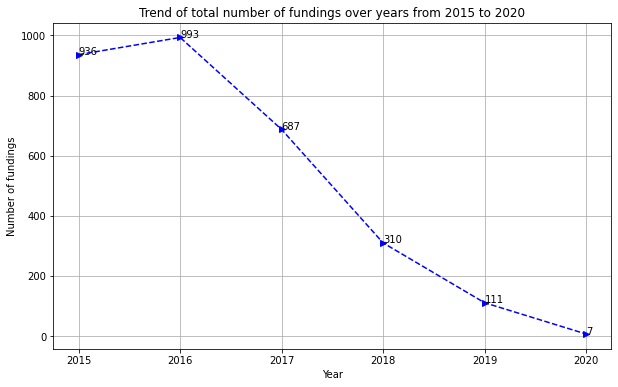

In [53]:
plt.figure(figsize = (10, 6))
plt.plot(year, frequency, 'b-->')
plt.title('Trend of total number of fundings over years from 2015 to 2020')
plt.xlabel('Year')
plt.ylabel('Number of fundings')
for _year, freq in zip(year, frequency) :
    plt.text(_year, freq, str(freq))
plt.grid()
plt.savefig('Plots/fig_1.png', bbox_inches = 'tight')
plt.show()

## 2.2) Top 10 Indian cities which have most number of startups :

In [54]:
knownCitiesDataset = dataset[dataset.City != 'Unknown']
cities = knownCitiesDataset.City
relevantData = cities.value_counts()[: 10]
city = relevantData.index
startupCounts = relevantData.values

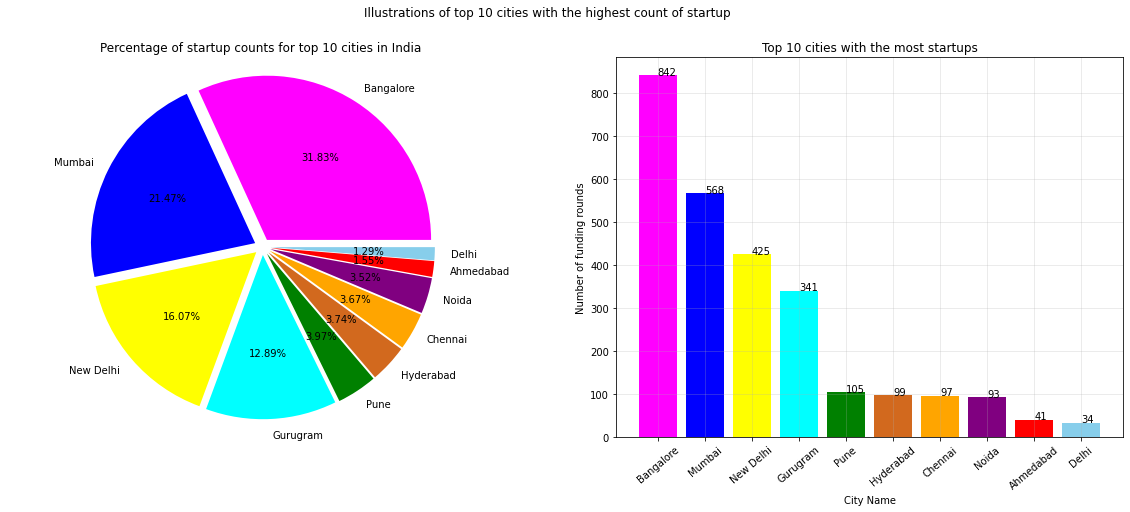

In [55]:
currentColors = random.sample(colours, 10)

plt.figure(figsize = (20, 7))

plt.subplot(1, 2, 1)
plt.pie(startupCounts, labels = city, autopct = '%.2f%%', explode = [0.05 for _ in range(len(startupCounts))], colors = currentColors)
plt.title('Percentage of startup counts for top 10 cities in India')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.grid(alpha = 0.3)
for _city, _startupCount, colour in zip(city, startupCounts, currentColors) :
    plt.bar(_city, _startupCount, color = colour)
    plt.text(_city, _startupCount, str(_startupCount))
plt.title('Top 10 cities with the most startups')
plt.ylabel('Number of funding rounds')
plt.xlabel('City Name')
plt.xticks(rotation = 40)

plt.suptitle('Illustrations of top 10 cities with the highest count of startup')
plt.savefig('Plots/fig_2.png', bbox_inches = 'tight')
plt.show()

## 2.3)  Top 10 Indian cities with most amount of fundings received :

In [56]:
from collections import Counter

cityWithTotalAmount = Counter()
for city, amount in zip(knownCitiesDataset.City, knownCitiesDataset.Amount) :
    cityWithTotalAmount[city] += amount

relevantData = cityWithTotalAmount.most_common()[: 10]
city = []
totalStartupAmount = []

for content in relevantData :
    city.append(content[0])
    totalStartupAmount.append(content[1])

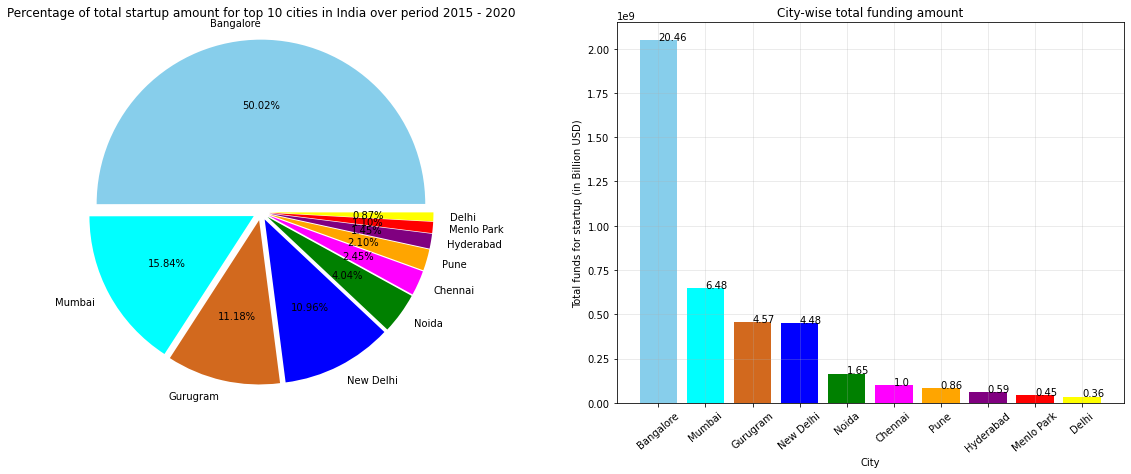

In [57]:
currentColors = random.sample(colours, 10)

plt.figure(figsize = (20, 7))

plt.subplot(1, 2, 1)
plt.pie(totalStartupAmount, labels = city, autopct = '%.2f%%', explode = [0.05 for _ in range(len(startupCounts))], colors = currentColors)
plt.title('Percentage of total startup amount for top 10 cities in India over period 2015 - 2020')
plt.axis('equal')

plt.subplot(1, 2, 2)
for _city, amount, colour in zip(city, totalStartupAmount, currentColors) :
    plt.bar(_city, amount / 10, color = colour)
    plt.text(_city, amount / 10, str(round(amount / (10 ** 9), 2)))
plt.xlabel('City')
plt.ylabel('Total funds for startup (in Billion USD)')
plt.xticks(rotation = 40)
plt.title('City-wise total funding amount')
plt.grid(alpha = 0.3)
plt.savefig('Plots/fig_3.png', bbox_inches = 'tight')
plt.show()

## 2.4) Percentage of amount funded for investment types that are Private Equity, Seed Funding, Debt Funding, and Crowd Funding :

In [58]:
definedInvestorTypeDataset = dataset[dataset.InvestorType != 'Undefined']
investorTypeToTotalAmount = Counter()

for investorType, amount in zip(definedInvestorTypeDataset.InvestorType, definedInvestorTypeDataset.Amount) :
    investorTypeToTotalAmount[investorType] += amount

inverstorType = ['Private', 'Seed', 'Debt', 'Crowd']
amount = [0, 0, 0, 0]
for content in investorTypeToTotalAmount.most_common() :
    if 'private' in content[0].lower() :
        amount[0] += content[1]
    if 'seed' in content[0].lower() :
        amount[1] += content[1]
    if 'debt' in content[0].lower() :
        amount[2] += content[1]
    if 'crowd' in content[0].lower() :
        amount[3] += content[1]

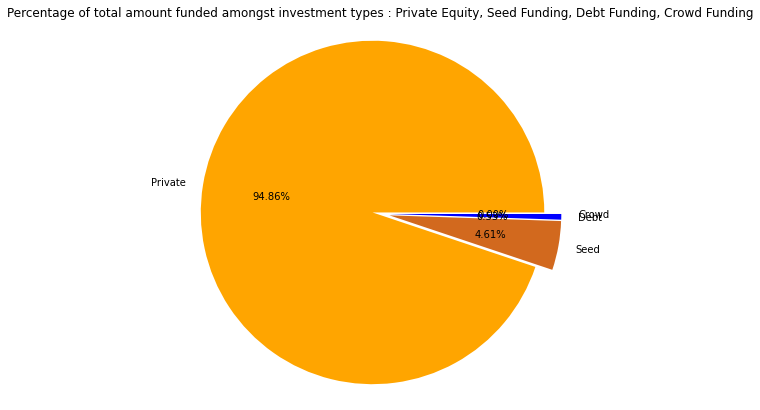

In [59]:
currentColors = random.sample(colours, 4)

plt.figure(figsize = (7, 7))
plt.pie(amount, labels = inverstorType, autopct = "%.2f%%", explode = [0.05 for _ in range(len(amount))], colors = currentColors)
plt.title('Percentage of total amount funded amongst investment types : Private Equity, Seed Funding, Debt Funding, Crowd Funding')
plt.axis('equal')
plt.savefig('Plots/fig_4.png', bbox_inches = 'tight')
plt.show()

## 2.5) Top 5 Industries that gets the most funding :

In [60]:
validIndustryDataset = dataset[dataset.IndustryVertical != 'Unknown']

industryTypeWithTotalFunding = Counter()
for industryType, amount in zip(validIndustryDataset.IndustryVertical, validIndustryDataset.Amount) :
    industryTypeWithTotalFunding[industryType] += amount

relevantData = industryTypeWithTotalFunding.most_common()[: 5]
industryType = []
totalAmount = []
for content in relevantData :
    industryType.append(content[0])
    totalAmount.append(content[1])

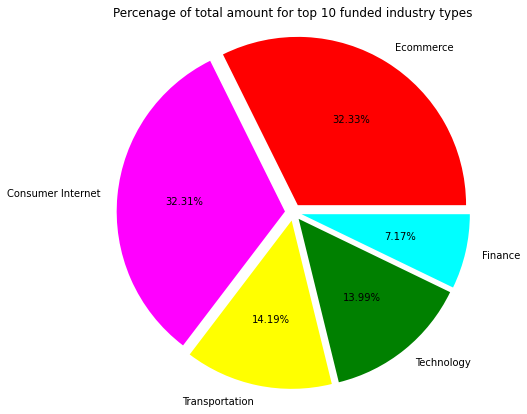

In [61]:
currentColors = random.sample(colours, 5)

plt.figure(figsize = (7, 7))
plt.pie(totalAmount, labels = industryType, autopct = '%.2f%%', explode = [0.05 for _ in range(len(totalAmount))], colors = currentColors)
plt.title('Percenage of total amount for top 10 funded industry types')
plt.axis('equal')
plt.savefig('Plots/fig_5.png', bbox_inches = 'tight')
plt.show()

## 2.6) Top 10 Startups with the maximim amount of funding :

In [62]:
startupsWithTotalFunding = Counter()

for startup, amount in zip(dataset.StartupName, dataset.Amount) :
    startupsWithTotalFunding[startup] += amount

relevantData = startupsWithTotalFunding.most_common()[: 10]
startup = []
totalAmount = []

for content in relevantData :
    startup.append(content[0])
    totalAmount.append(content[1])

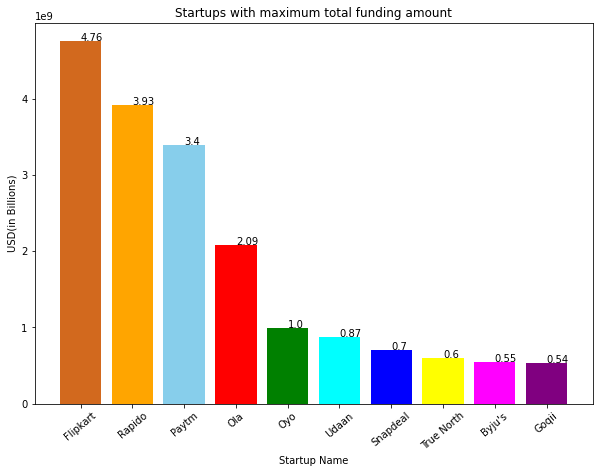

In [63]:
currentColors = random.sample(colours, 10)

plt.figure(figsize = (10, 7))
for _startup, _totalAmount, colour in zip(startup, totalAmount, currentColors) :
    plt.bar(_startup, _totalAmount, color = colour)
    plt.text(_startup, _totalAmount, str(round(_totalAmount / (10 ** 9), 2)))

plt.title('Startups with maximum total funding amount')
plt.xlabel('Startup Name')
plt.ylabel('USD(in Billions)')
plt.xticks(rotation = 40)
plt.savefig('Plots/fig_6.png', bbox_inches = 'tight')
plt.show()

## 2.7) Top 10 startups which had the most funding rounds :

In [64]:
relevantData = dataset.StartupName.value_counts()[: 10]
startup = relevantData.index
rounds = relevantData.values

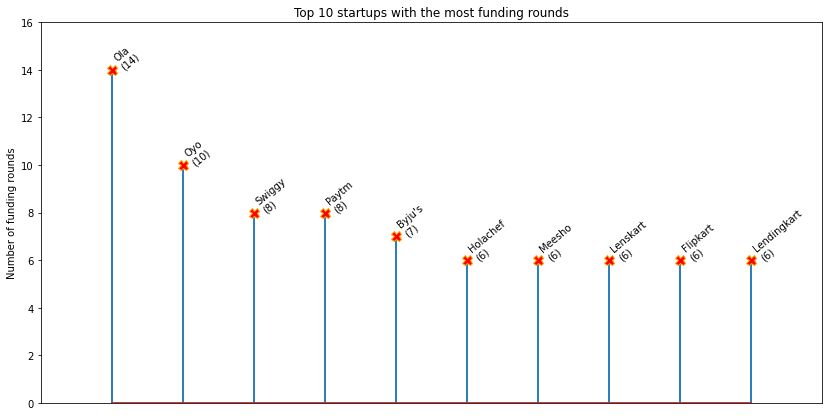

In [65]:
plt.figure(figsize = (14, 7))
plt.stem(rounds, markerfmt = ' ')

(markers, stemlines, baseline) = plt.stem(rounds)
plt.setp(markers, marker = 'X', markersize = 10, markeredgecolor = "orange", markeredgewidth = 1, color = 'red')
index = 0
for _startup, _round, colour in zip(startup, rounds, currentColors) :
    plt.text(index, _round, str(_startup) + '\n(' + str(_round) + ")", rotation = 40)
    index += 1

plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.ylabel('Number of funding rounds')
plt.title('Top 10 startups with the most funding rounds')
plt.ylim(0, 16)
plt.xlim(-1, 10)
plt.savefig('Plots/fig_7.png', bbox_inches = 'tight')
plt.show()

## 2.8) Top 5 Investors, who have invested for maximum number of times :

In [66]:
knownInvestorsDataset = dataset[dataset.InvestorName != 'Undisclosed Investors']

investorWithFrequency = Counter()
for names in knownInvestorsDataset.InvestorName :
    for name in names.split(',') :
        investorWithFrequency[name] += 1

relevantData = investorWithFrequency.most_common()[: 5]
investorName = []
investorFrequency = []

for content in relevantData :
    investorName.append(content[0])
    investorFrequency.append(content[1])

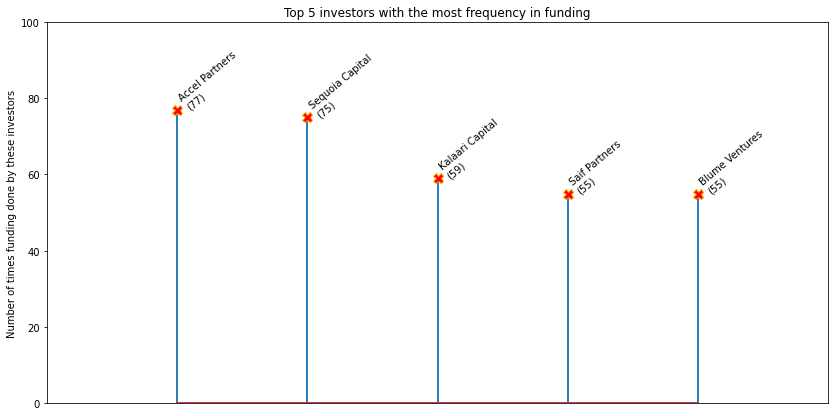

In [67]:
currentColors = random.sample(colours, 5)

plt.figure(figsize = (14, 7))
plt.stem(investorFrequency, markerfmt = ' ')

(markers, stemlines, baseline) = plt.stem(investorFrequency)
plt.setp(markers, marker = 'X', markersize = 10, markeredgecolor = "orange", markeredgewidth = 1, color = 'red')
index = 0
for name, freq, colour in zip(investorName, investorFrequency, currentColors) :
    plt.text(index, freq, str(name) + '\n(' + str(freq) + ")", rotation = 40)
    index += 1

plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.ylabel('Number of times funding done by these investors')
plt.title('Top 5 investors with the most frequency in funding')
plt.ylim(0, 100)
plt.xlim(-1, 5)
plt.savefig('Plots/fig_8.png', bbox_inches = 'tight')
plt.show()

## 2.9) Funding of the 4 major investment types, that are Private Equity, Seed Funding, Debt Funding, and Crowd Funding over 2015 - 2020:

In [68]:
privateData = {}
seedData = {}
debtData = {}
crowdData = {}

for year in dataset.Date.dt.year :
    privateData[year] = 0
    seedData[year] = 0
    debtData[year] = 0
    crowdData[year] = 0

for index in range(dataset.shape[0]) :
    fundType = dataset.loc[index].InvestorType.lower()
    amount = dataset.loc[index].Amount
    year = dataset.loc[index].Date.year
    if 'private' in fundType :
        privateData[year] += amount
    if 'seed' in fundType :
        seedData[year] += amount
    if 'debt' in fundType :
        debtData[year] += amount
    if 'crowd' in fundType :
        crowdData[year] += amount

privateYears = sorted(privateData.keys())
privateAmount = []
for year in privateYears :
    privateAmount.append(privateData[year] / (10 ** 9))

seedYears = sorted(seedData.keys())
seedAmount = []
for year in seedYears :
    seedAmount.append(seedData[year] / (10 ** 9))

debtYears = sorted(debtData.keys())
debtAmount = []
for year in debtYears :
    debtAmount.append(debtData[year] / (10 ** 9))

crowdYears = sorted(crowdData.keys())
crowdAmount = []
for year in crowdYears :
    crowdAmount.append(crowdData[year] / (10 ** 9))

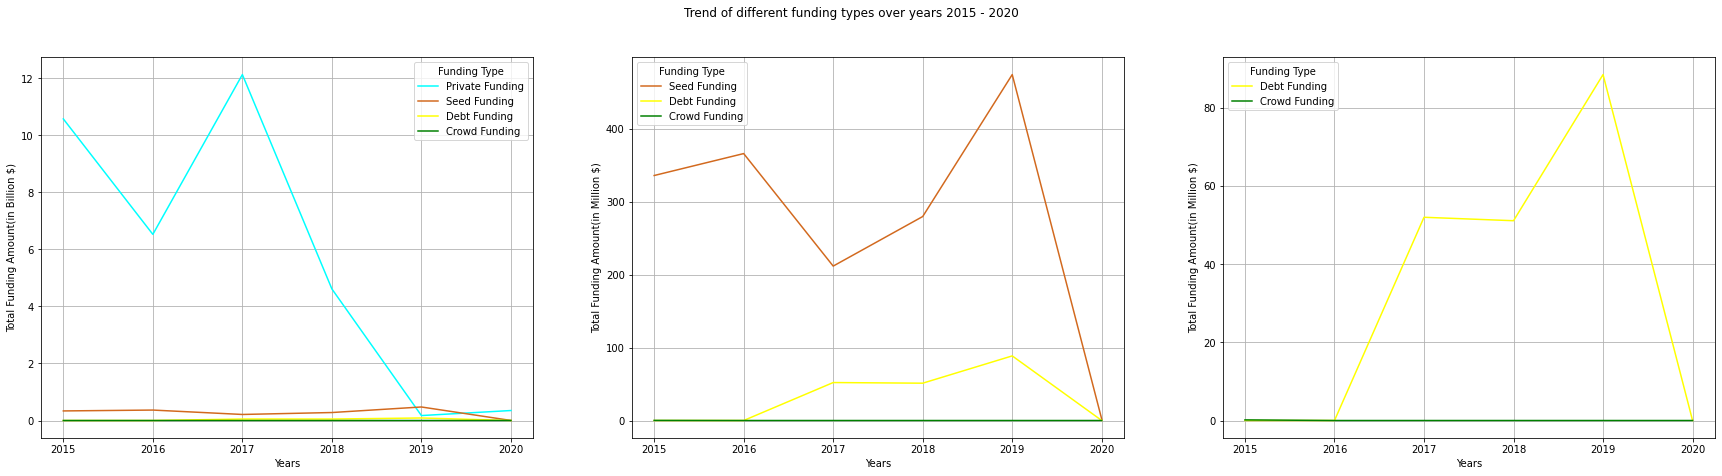

In [69]:
currentColor = random.sample(colours, 4)

plt.figure(figsize = (30, 7))

plt.subplot(1, 3, 1)
plt.plot(privateYears, privateAmount, label = 'Private Funding', color = currentColor[0])
plt.plot(seedYears, seedAmount, label = 'Seed Funding', color = currentColor[1])
plt.plot(debtYears, debtAmount, label = 'Debt Funding', color = currentColor[2])
plt.plot(crowdYears, crowdAmount, label = 'Crowd Funding', color = currentColor[3])
plt.legend(title = 'Funding Type')
plt.grid()
plt.xlabel('Years')
plt.ylabel('Total Funding Amount(in Billion $)')

plt.subplot(1, 3, 2)
plt.plot(seedYears, [(amount * 1000) for amount in seedAmount], label = 'Seed Funding', color = currentColor[1])
plt.plot(debtYears, [(amount * 1000) for amount in debtAmount], label = 'Debt Funding', color = currentColor[2])
plt.plot(crowdYears, [(amount * 1000) for amount in crowdAmount], label = 'Crowd Funding', color = currentColor[3])
plt.legend(title = 'Funding Type')
plt.grid()
plt.xlabel('Years')
plt.ylabel('Total Funding Amount(in Million $)')

plt.subplot(1, 3, 3)
plt.plot(debtYears, [(amount * 1000) for amount in debtAmount], label = 'Debt Funding', color = currentColor[2])
plt.plot(crowdYears, [(amount * 1000) for amount in crowdAmount], label = 'Crowd Funding', color = currentColor[3])
plt.legend(title = 'Funding Type')
plt.grid()
plt.xlabel('Years')
plt.ylabel('Total Funding Amount(in Million $)')

plt.suptitle('Trend of different funding types over years 2015 - 2020')
plt.savefig('Plots/fig_9.png', bbox_inches = 'tight')
plt.show()

## 2.10) Funding status of top 5 most amount funded over year 2015 - 2020 :

In [70]:
startupToTotalAmount = Counter()
for index in range(dataset.shape[0]) :
    startupName = dataset.loc[index].StartupName
    amount = dataset.loc[index].Amount
    startupToTotalAmount[startupName] += amount

relevantData = startupToTotalAmount.most_common()[: 5]
top_5_startups = [content[0] for content in relevantData]

startup_1_name = top_5_startups[0]
startup_1_data = {}
startup_2_name = top_5_startups[1]
startup_2_data = {}
startup_3_name = top_5_startups[2]
startup_3_data = {}
startup_4_name = top_5_startups[3]
startup_4_data = {}
startup_5_name = top_5_startups[4]
startup_5_data = {}

years = sorted(dataset.Date.dt.year.unique())
for year in years :
    startup_1_data[year] = 0
    startup_2_data[year] = 0
    startup_3_data[year] = 0
    startup_4_data[year] = 0
    startup_5_data[year] = 0

for index in range(dataset.shape[0]) :
    startupName = dataset.loc[index].StartupName
    year = dataset.loc[index].Date.year
    amount = dataset.loc[index].Amount
    if startupName == startup_1_name :
        startup_1_data[year] += amount
    elif startupName == startup_2_name :
        startup_2_data[year] += amount
    elif startupName == startup_3_name :
        startup_3_data[year] += amount
    elif startupName == startup_4_name :
        startup_4_data[year] += amount
    elif startupName == startup_5_name :
        startup_5_data[year] += amount

startup_1_yearwiseAmount = []
startup_2_yearwiseAmount = []
startup_3_yearwiseAmount = []
startup_4_yearwiseAmount = []
startup_5_yearwiseAmount = []

for year in years :
    startup_1_yearwiseAmount.append(startup_1_data[year] / (10 ** 9))
    startup_2_yearwiseAmount.append(startup_2_data[year] / (10 ** 9))
    startup_3_yearwiseAmount.append(startup_3_data[year] / (10 ** 9))
    startup_4_yearwiseAmount.append(startup_4_data[year] / (10 ** 9))
    startup_5_yearwiseAmount.append(startup_5_data[year] / (10 ** 9))

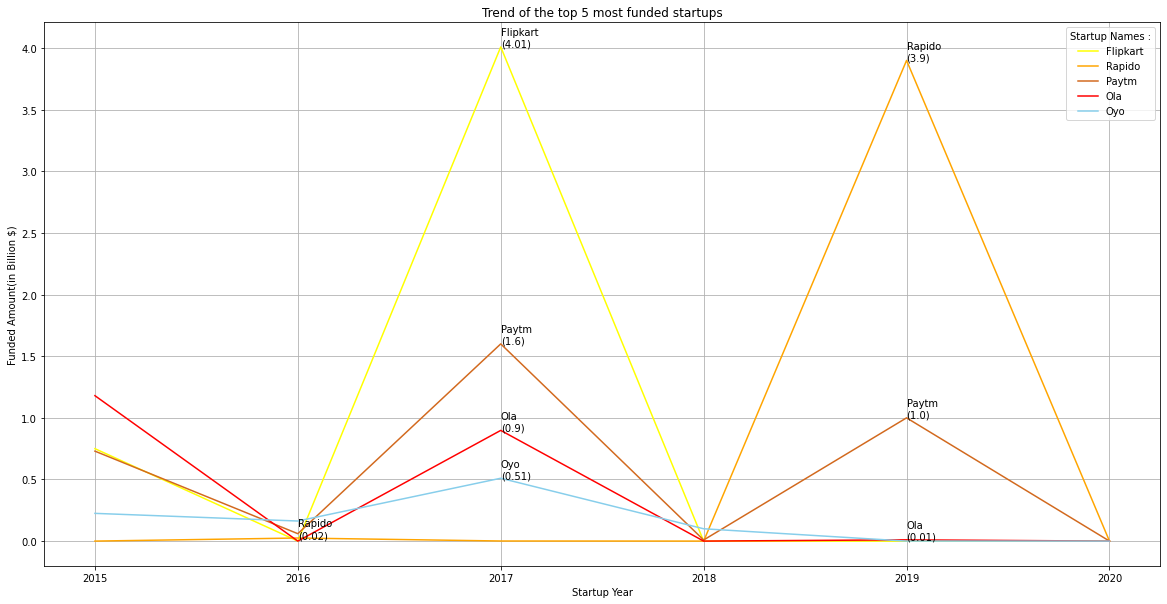

In [71]:
currentColors = random.sample(colours, 5)

plt.figure(figsize = (20, 10))

plt.plot(years, startup_1_yearwiseAmount, label = startup_1_name, color = currentColors[0])
plt.plot(years, startup_2_yearwiseAmount, label = startup_2_name, color = currentColors[1])
plt.plot(years, startup_3_yearwiseAmount, label = startup_3_name, color = currentColors[2])
plt.plot(years, startup_4_yearwiseAmount, label = startup_4_name, color = currentColors[3])
plt.plot(years, startup_5_yearwiseAmount, label = startup_5_name, color = currentColors[4])

for index in range(1, len(years) - 1) :
    if startup_1_yearwiseAmount[index] > startup_1_yearwiseAmount[index - 1] and startup_1_yearwiseAmount[index] > startup_1_yearwiseAmount[index + 1] :
        plt.text(years[index], startup_1_yearwiseAmount[index], startup_1_name + '\n(' + str(round(startup_1_yearwiseAmount[index], 2)) + ')')
    if startup_2_yearwiseAmount[index] > startup_2_yearwiseAmount[index - 1] and startup_2_yearwiseAmount[index] > startup_2_yearwiseAmount[index + 1] :
        plt.text(years[index], startup_2_yearwiseAmount[index], startup_2_name + '\n(' + str(round(startup_2_yearwiseAmount[index], 2)) + ')')
    if startup_3_yearwiseAmount[index] > startup_3_yearwiseAmount[index - 1] and startup_3_yearwiseAmount[index] > startup_3_yearwiseAmount[index + 1] :
        plt.text(years[index], startup_3_yearwiseAmount[index], startup_3_name + '\n(' + str(round(startup_3_yearwiseAmount[index], 2)) + ')')
    if startup_4_yearwiseAmount[index] > startup_4_yearwiseAmount[index - 1] and startup_4_yearwiseAmount[index] > startup_4_yearwiseAmount[index + 1] :
        plt.text(years[index], startup_4_yearwiseAmount[index], startup_4_name + '\n(' + str(round(startup_4_yearwiseAmount[index], 2)) + ')')
    if startup_5_yearwiseAmount[index] > startup_5_yearwiseAmount[index - 1] and startup_5_yearwiseAmount[index] > startup_5_yearwiseAmount[index + 1] :
        plt.text(years[index], startup_5_yearwiseAmount[index], startup_5_name + '\n(' + str(round(startup_5_yearwiseAmount[index], 2)) + ')')

plt.xlabel('Startup Year')
plt.ylabel('Funded Amount(in Billion $)')
plt.title('Trend of the top 5 most funded startups')

plt.legend(title = 'Startup Names :')
plt.grid()
plt.savefig('Plots/fig_10.png', bbox_inches = 'tight')
plt.show()